# <font color='red'>ch11_N차원 배열 다루기</font>

## 4 복사와 뷰

### 4.1 모두 복사 안함(스칼라 변수만 제외)

In [1]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [2]:
a.shape, type(a)

((12,), numpy.ndarray)

In [7]:
b = a # a와 b는 같은 넘파이배열 객체이지만 이름만 다름(복사 안됨)
a is b

True

In [6]:
b.shape=3,4
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
id(a),id(b)
# 주소만 전달된다.

(2368668665696, 2368668665696)

In [10]:
def f(data):
    print(id(data))

In [12]:
f(a),f(b)

2368668665696
2368668665696


(None, None)

### 4.2 얕은 복사 view

In [14]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [15]:
c = a.view()
c is a

False

In [16]:
b = a
b is a

True

In [17]:
c.flags.owndata # c가 메모리를 직접 소유하지는 않음 

False

In [18]:
c.shape = (2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [19]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
c[:,2]=999 # 2대신 999 ,8대신 999
c

array([[  0,   1, 999,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11]])

In [22]:
a

array([[  0,   1, 999,   3],
       [  4,   5,   6,   7],
       [999,   9,  10,  11]])

In [24]:
# view는 shape만 가지고 있고 , data는 원래 주소에 저장되어있다.

In [25]:
a = np.arange(12).reshape(3,4)
s = a[:,1:3] # 슬레이싱 될때 뷰가 반환

In [26]:
print(a)
print(s)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 1  2]
 [ 5  6]
 [ 9 10]]


In [27]:
s[:,1] = 100

In [28]:
s

array([[  1, 100],
       [  5, 100],
       [  9, 100]])

In [29]:
a

array([[  0,   1, 100,   3],
       [  4,   5, 100,   7],
       [  8,   9, 100,  11]])

### 4.3 깊은 복사 copy

In [36]:
a = np.arange(12).reshape(3,4)
d = a.copy()
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [37]:
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [38]:
d is a

False

In [39]:
d.flags.owndata # d객체가 메모리를 직접 소유

True

In [40]:
d.base is a # d와 a는 어떤 것도 공유하지 않고있음

False

In [43]:
d.shape = (2,6)
d

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [42]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [45]:
d[0]=99
d

array([[99, 99, 99, 99, 99, 99],
       [ 6,  7,  8,  9, 10, 11]])

In [46]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [47]:
# copy는 완전 별개.

## 5 고급 인덱싱
### 5.1 인덱스 배열로 인덱싱

In [48]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121],
      dtype=int32)

In [50]:
i = np.array([1,1,3,8,5])

In [51]:
a[i] # 배열내 데이터값을 인덱스로 받아서 인덱싱 할 수 있다.

array([ 1,  1,  9, 64, 25], dtype=int32)

In [52]:
l = [1,1,3,8,5]
a[l]

array([ 1,  1,  9, 64, 25], dtype=int32)

In [54]:
j = np.array([[3,4],[9,7]]) # 2차원 배열로 인덱싱하면 2차원 배열로 반환된다.
a[j]

array([[ 9, 16],
       [81, 49]], dtype=int32)

In [58]:
## 인덱스의 단일 배열은 첫번째 차원 참조

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

### 5.2 인덱스의 단일 배열은 첫번째 차원 참조

In [62]:
palette = np.array([
    [0,0,0],
    [255,0,0],
    [0,255,0],
    [0,0,255],
    [255,255,255]
])
palette

array([[  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [  0,   0, 255],
       [255, 255, 255]])

In [63]:
image_index = np.array([
    [4,4,4,0,0,0,0,4,4,4],
    [4,0,0,4,4,4,4,0,0,4],
    [0,0,4,4,4,4,4,4,0,0],
    [0,4,4,1,4,4,3,4,4,0],
    [0,4,4,1,4,4,3,4,4,0],
    [0,4,4,4,4,4,4,4,4,0],
    [0,4,4,2,4,4,2,4,4,0],
    [4,0,4,4,2,2,4,4,0,4],
    [4,4,0,4,4,4,4,0,4,4],
    [4,4,4,0,0,0,0,4,4,4]
])
image_index

array([[4, 4, 4, 0, 0, 0, 0, 4, 4, 4],
       [4, 0, 0, 4, 4, 4, 4, 0, 0, 4],
       [0, 0, 4, 4, 4, 4, 4, 4, 0, 0],
       [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
       [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
       [0, 4, 4, 4, 4, 4, 4, 4, 4, 0],
       [0, 4, 4, 2, 4, 4, 2, 4, 4, 0],
       [4, 0, 4, 4, 2, 2, 4, 4, 0, 4],
       [4, 4, 0, 4, 4, 4, 4, 0, 4, 4],
       [4, 4, 4, 0, 0, 0, 0, 4, 4, 4]])

In [64]:
image_data = palette[image_index]
image_data

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 

In [ ]:
#%matplotlib inline 주피터노트북을 실행한 브라우저에서 그림을 바로 볼 수 있게

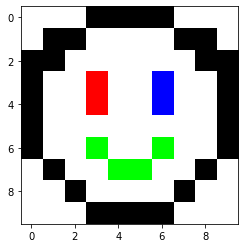

In [65]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(image_data,interpolation = 'nearest')
plt.show()

In [66]:
# tensorflow import

In [68]:
import  tensorflow.keras.datasets.mnist as mnist
mnist = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [70]:
mnist[0][0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

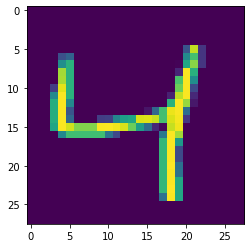

In [71]:
mnist_data = mnist[0][0]
import matplotlib.pyplot as plt
plt.imshow(mnist_data[2])

In [72]:
### 5.2 다차원 인덱싱

In [73]:
import numpy as np
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [75]:
i = np.array([[0,1],
             [1,2]])
j = np.array([[2,1],
             [3,3]])
print(i)
print(j)

[[0 1]
 [1 2]]
[[2 1]
 [3 3]]


In [76]:
a[i,j]

array([[ 2,  5],
       [ 7, 11]])

In [78]:
a[i] #행만 기입하면 열은 모든 열을 의미

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [80]:
np.all(a[i,]==a[i]) # 모든 요소가 true면 true 반납

True

In [82]:
i

array([[0, 1],
       [1, 2]])

In [83]:
a[i,np.array([[2,2],[2,2]])] # 0행 2열 ,1,행 2열
#                               1행2열 , 2행 2열

array([[ 2,  6],
       [ 6, 10]])

In [84]:
a[i,2]

array([[ 2,  6],
       [ 6, 10]])

### 5.3 argmax ; 최대값이 있는 곳의 인덱스를 가져옴

In [85]:
data = np.sin(np.arange(20)).reshape(5,4)
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [87]:
ind = data.argmax(axis=0) #각 열에서 큰값이 잇는 인덱스를 반환
ind

array([2, 0, 3, 1], dtype=int64)

In [93]:
data_col_max = data[ind, range(data.shape[1])]
data_col_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [95]:
for i, item in enumerate(data_col_max):
    print("{}번째 열의 최대값은 {:.5f}".format(i,item))

0번째 열의 최대값은 0.98936
1번째 열의 최대값은 0.84147
2번째 열의 최대값은 0.99061
3번째 열의 최대값은 0.65699


In [97]:
data.max(axis=0)

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [98]:
np.all(data.max(axis=0)) == data_col_max

array([False, False, False, False])

In [99]:
#행다마 최대값을 출력하기\(argmax이용)

In [105]:
i=data.argmax(axis=1)

In [107]:
data_row_max = data[range(data.shape[0]),i]
data_row_max

array([0.90929743, 0.6569866 , 0.98935825, 0.99060736, 0.14987721])

### 5.4 인덱싱을 이용한 값변경

In [110]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [111]:
a[[1,3,4]] = 0
a

array([0, 0, 2, 0, 0])

In [113]:
a = np.arange(5)
a[[0,0,2]] = [99,999,999]
a

array([999,   1, 999,   3,   4])

In [114]:
a = np.arange(5)
print('변경전 : ',a)
a[[0,0,2]] += 1
print('변경후 : ',a)

변경전 :  [0 1 2 3 4]
변경후 :  [1 1 3 3 4]


### 5.5 논리배열을 이용한 인덱싱

In [115]:
a = np.arange(20).reshape(4,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [116]:
a%2==0

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [117]:
a[a%2==0]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [118]:
a[a%2==0] = a[a%2==0]**2
a

array([[  0,   1,   4,   3,  16],
       [  5,  36,   7,  64,   9],
       [100,  11, 144,  13, 196],
       [ 15, 256,  17, 324,  19]])

### 5.5 ix_() 함수
- N개의 1차원 시퀀스 배열을 입력받아 N차원 N개를 반환

In [119]:
a = np.array([1,2,3,4])
b = np.array([11,12,13])
np.ix_(a,b)

(array([[1],
        [2],
        [3],
        [4]]),
 array([[11, 12, 13]]))

In [120]:
ax,bx = np.ix_(a,b)

In [121]:
print(ax)
print(bx)

[[1]
 [2]
 [3]
 [4]]
[[11 12 13]]


In [122]:
ax.shape,ax.ndim

((4, 1), 2)

In [123]:
bx.shape,bx.ndim

((1, 3), 2)

In [125]:
r = np.add(ax,bx)
r

array([[12, 13, 14],
       [13, 14, 15],
       [14, 15, 16],
       [15, 16, 17]])

In [127]:
print(a[1]+b[2])
print(r[1,2])

15
15


## 6 선형대수학
- 2차원 넘파이 배열을 행렬
    - 행렬곱 : @ 또는 np.dot()
    - 역행렬 : np.linalg.inv(x)
    - 전치행렬 : x.T, x.transpose()
    - 단위행렬 : np.eye(n)
    - 대각합 : np.trace(x)
    - 연립방정식 해 풀기 : np.linalg.solve(a,b)

### 6.1 선형연립방정식 풀이(회귀도출) ; 독립변수 2개, 데이터 2개

In [143]:
a = np.array([[1,2],
             [3,4]])
a

array([[1, 2],
       [3, 4]])

In [133]:
y = np.array([[5],
              [7]])
y

array([[5],
       [7]])

**a @ X = y**<br>
**a의 역행렬 @ a @ X = a의 역행렬 @ y**

In [135]:
# a의 역행렬 @ a가 단위행렬인지 확인
np.linalg.inv(a) @a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

In [138]:
np.eye(2)@a == a

array([[ True,  True],
       [ True,  True]])

In [139]:
a @ np.eye(2) ==a

array([[ True,  True],
       [ True,  True]])

In [141]:
x = np.linalg.inv(a)@y
x

array([[-3.],
       [ 4.]])

In [ ]:
# 독립변수 2,3 일 경우 종속변수 값은 ?

In [142]:
2*-3 +3*4

6

### 6.2 선형연립방정식 풀이(회귀도출)과 그래프 ; 독립변수 1개

**정방행렬을 위한 데이터**

In [144]:
x = [2,3]
y = [6.8,7.3]

In [147]:
# 2 1
# 3 1
A = np.column_stack((np.array(x),np.ones(len(x))))
A

array([[2., 1.],
       [3., 1.]])

In [149]:
Y = np.array(y).reshape(2,1)
Y

array([[6.8],
       [7.3]])

**A@X = Y**
**X = A의 역행렬@Y**

In [150]:
X = np.linalg.inv(A)@Y

In [152]:
X

array([[0.5],
       [5.8]])

In [153]:
# 연립방적식 해법을 구하는 함수

In [154]:
np.linalg.solve(A,Y)

array([[0.5],
       [5.8]])

In [157]:
f = A[:,0]*X[0] +X[1] #도출된 회귀식
f

array([6.8, 7.3])

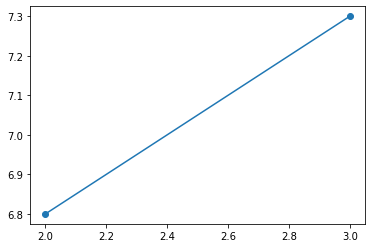

In [159]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(A[:,0],f,'-')
plt.show()

**데이터를 n개**

In [164]:
x = [32,64,96,118,216,114,152,158] # 독립변수
y = [18,24,61.5,49,52,105,130,125] # 종속변수

In [165]:
A = np.column_stack((x,np.ones(len(x))))
A # 독립변수 행렬

array([[ 32.,   1.],
       [ 64.,   1.],
       [ 96.,   1.],
       [118.,   1.],
       [216.,   1.],
       [114.,   1.],
       [152.,   1.],
       [158.,   1.]])

In [167]:
B = np.array(y)
B # 종속변수 행렬

array([ 18. ,  24. ,  61.5,  49. ,  52. , 105. , 130. , 125. ])

**A@X=B** <br>
**A.T@A@X =A.T@B** <br>
**X=(A.T@A)의 역행렬@A.T@B**

In [170]:
X = np.linalg.inv(A.T@A)@A.T@B
X

array([ 0.40900507, 21.99314773])

In [ ]:
#np.linalg.solve(A,B) 불가

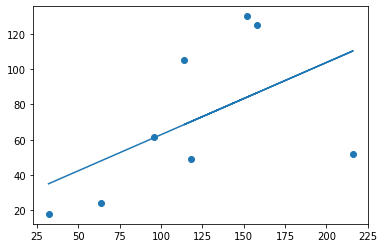

In [173]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(A[:,0],A[:,0]*X[0]+X[1],'-')
plt.show()

## 7 유용한 팁

In [174]:
mu,sigma = 2, 0.5 # mu는 평균 , sigma 는 표준편차
v = np.random.normal(mu,sigma,100000) # 정규분포 데이터 만들기
(n,bins) = np.histogram(v, bins=50, density=True)
n,bins

(array([2.16230023e-04, 1.08115011e-04, 1.40549515e-03, 3.13533533e-03,
        4.32460046e-03, 9.62223602e-03, 1.44874115e-02, 2.24879224e-02,
        3.44886887e-02, 5.14627455e-02, 7.83833833e-02, 1.23142998e-01,
        1.69524338e-01, 2.20878968e-01, 2.88342736e-01, 3.73321135e-01,
        4.63380939e-01, 5.50197293e-01, 6.38959718e-01, 7.12261696e-01,
        7.57129425e-01, 7.86861054e-01, 7.95834599e-01, 7.80914728e-01,
        7.30857478e-01, 6.54744509e-01, 5.66847005e-01, 4.90085347e-01,
        3.98079472e-01, 3.13425418e-01, 2.36663760e-01, 1.79903379e-01,
        1.25089068e-01, 8.36810189e-02, 6.05444064e-02, 3.37318836e-02,
        2.52989127e-02, 1.38387215e-02, 8.21674087e-03, 4.97329053e-03,
        2.59476028e-03, 1.08115011e-03, 3.24345034e-04, 2.16230023e-04,
        2.16230023e-04, 0.00000000e+00, 1.08115011e-04, 0.00000000e+00,
        0.00000000e+00, 1.08115011e-04]),
 array([-0.04466894,  0.04782515,  0.14031924,  0.23281334,  0.32530743,
         0.41780152, 

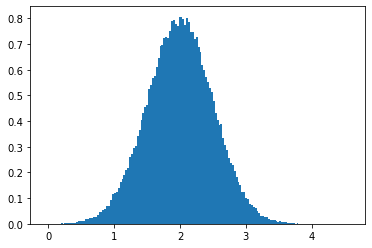

In [176]:
plt.hist(v,bins='auto',density=1)
plt.show()

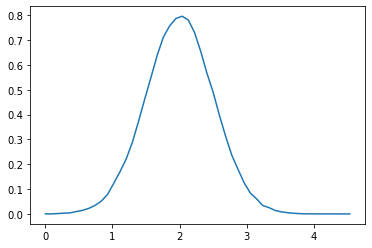

In [177]:
plt.plot((bins[:-1]+bins[1:])/2,n)

## 8 연습문제

In [180]:
#1 
import numpy as np 
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data

In [198]:
## 1 
# 각 변수별 평균
iris_mu = np.mean(iris_data,0)
iris_mu

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [190]:
## 2 
# 처음 다섯 개 행
iris_data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [192]:
## 3
# 처음 다섯개 행에서 마지막 열을 제외한 나머지 열을 출력
iris_data[0:5,0:3]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [193]:
## 4
# 처음 다섯개 행에서 마지막 열만 출력하세요
iris_data[0:5,-1]

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [194]:
## 5
# 3번 배열과 4번 배열을 원래 모양이 되도록 합치세요. 실행 결과는 2번의 결과와 같아야 합니다.
np.column_stack((iris_data[0:5,0:3],iris_data[0:5,-1]))

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [213]:
## 6
# 처음 다섯 개 행을 이용해서 각 열 별로 평균보다 큰 값들만 출력하세요
iris_5 = iris_data[0:5]
iris_mu5 = np.mean(iris_5,0)
iris_mu5

array([4.86, 3.28, 1.4 , 0.2 ])

In [207]:
up = iris_5 > iris_mu5

In [214]:
iris_5[up]

array([5.1, 3.5, 4.9, 1.5, 5. , 3.6])

In [215]:
#문제풀이형 
#1
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [217]:
print(a.sum(0))

[12 15 18 21]


In [219]:
#2
a = np.floor(10*np.random.random((3,4)))
a

array([[1., 0., 8., 0.],
       [7., 4., 5., 8.],
       [0., 9., 8., 0.]])

In [220]:
a.shape

(3, 4)

In [221]:
a.ravel()

array([1., 0., 8., 0., 7., 4., 5., 8., 0., 9., 8., 0.])

In [222]:
a.reshape(6,2)

array([[1., 0.],
       [8., 0.],
       [7., 4.],
       [5., 8.],
       [0., 9.],
       [8., 0.]])

In [224]:
a.resize((2,6))
a

array([[1., 0., 8., 0., 7., 4.],
       [5., 8., 0., 9., 8., 0.]])

In [227]:
#3
a = np.arange(12).reshape(3,4)
a[:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [228]:
#4
a = np.array([1,2,3,4,5])
a[[1,3,4]]=0
a

array([1, 0, 3, 0, 0])

In [234]:
#5
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])
np.c_[a,b]

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])